In [2]:
import numpy as np 
import pandas as pd  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv('loan.csv') 

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Exploratory Data Analysis

In [10]:
from ydata_profiling import ProfileReport

report = ProfileReport(df)
report.to_file(output_file= 'EDA.html')

C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 199.75it/s]


# Univariate 

In [11]:
#gender

df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Gender'].value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

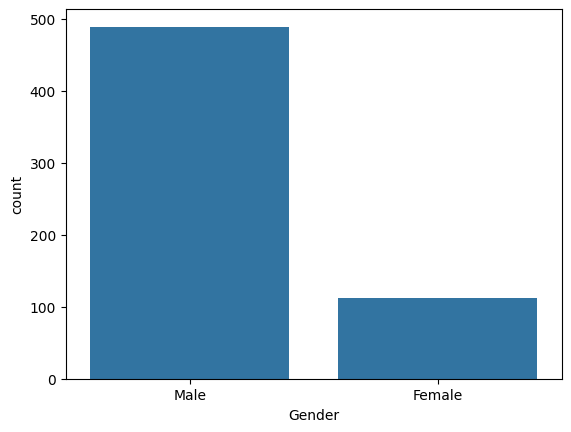

In [13]:
sns.countplot(data=df, x='Gender')

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

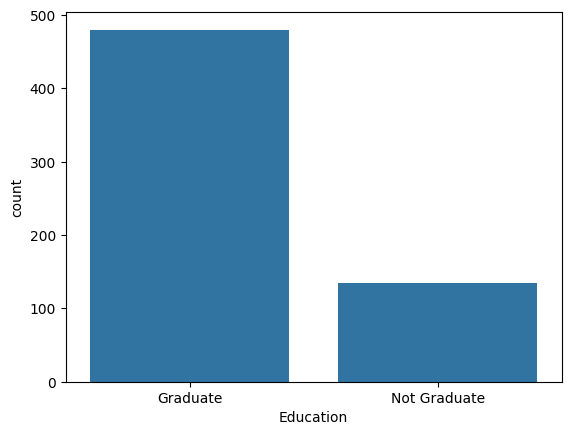

In [14]:
#Education

print(df['Education'].value_counts(dropna=False))
sns.countplot(data=df, x="Education")

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

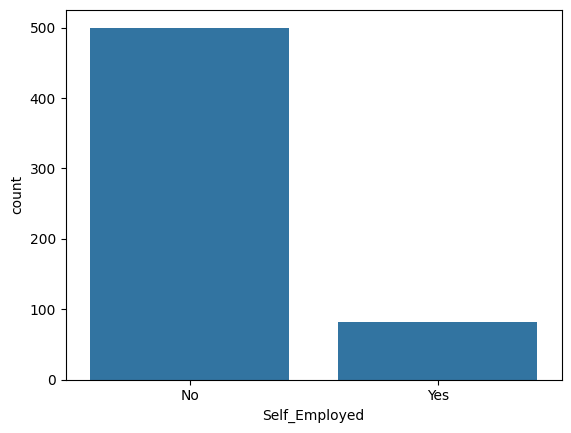

In [15]:
#Self_Employed

print(df['Self_Employed'].value_counts(dropna=False))
sns.countplot(data=df, x="Self_Employed")

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
5403.459283387622


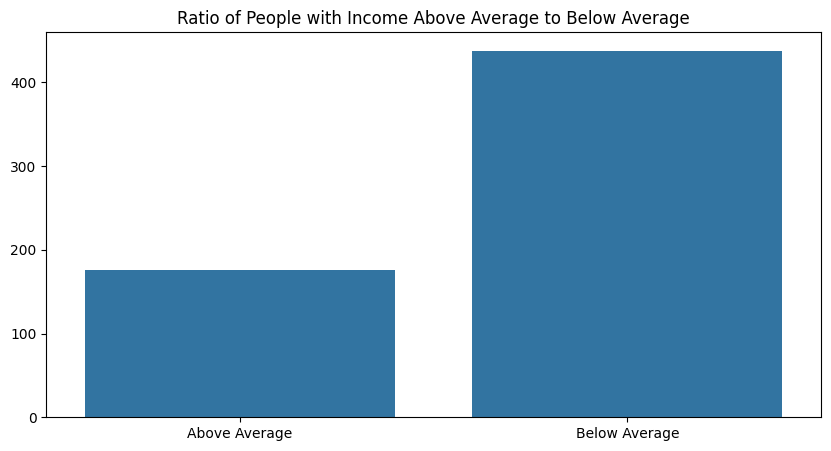

In [16]:
#ApplicantIncome

print(df['ApplicantIncome'].describe())
average_income= df['ApplicantIncome'].mean()
print(average_income)

above_average= (df['ApplicantIncome']>= average_income).sum()
below_average= (df['ApplicantIncome']<= average_income).sum()

plt.figure(figsize=(10,5))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average, below_average])
plt.title('Ratio of People with Income Above Average to Below Average')
plt.show()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
1621.2457980271008


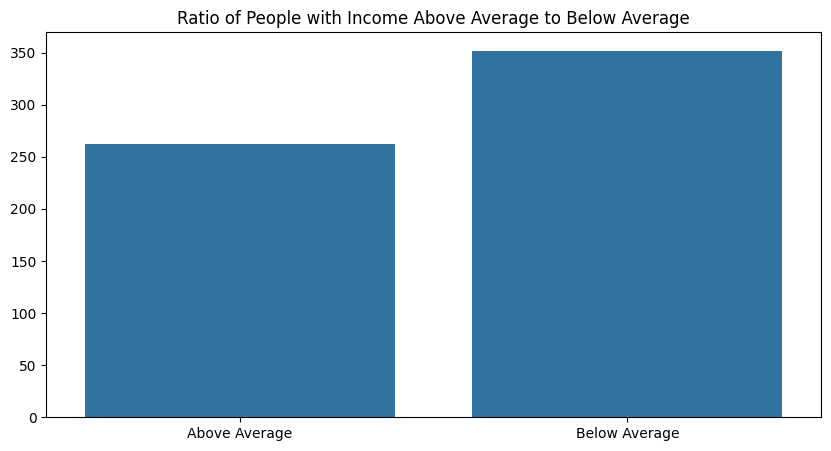

In [17]:
#CoapplicantIncome

print(df['CoapplicantIncome'].describe())
average_income= df['CoapplicantIncome'].mean()
print(average_income)

above_average= (df['CoapplicantIncome']>= average_income).sum()
below_average= (df['CoapplicantIncome']<= average_income).sum()

plt.figure(figsize=(10,5))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average, below_average])
plt.title('Ratio of People with Income Above Average to Below Average')
plt.show()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

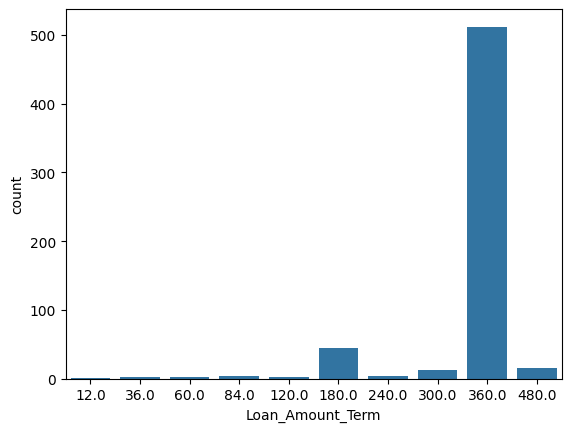

In [18]:
#Loan_Amount_Term


print(df['Loan_Amount_Term'].value_counts(dropna=False))

sns.countplot(data=df, x='Loan_Amount_Term')

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

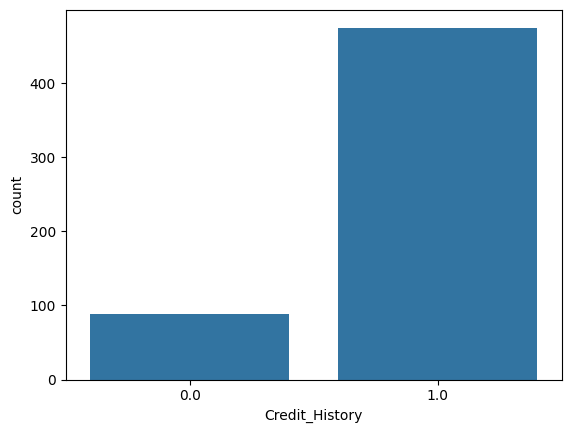

In [19]:
#Credit History

print(df['Credit_History'].value_counts(dropna=False))

sns.countplot(data=df, x='Credit_History')

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

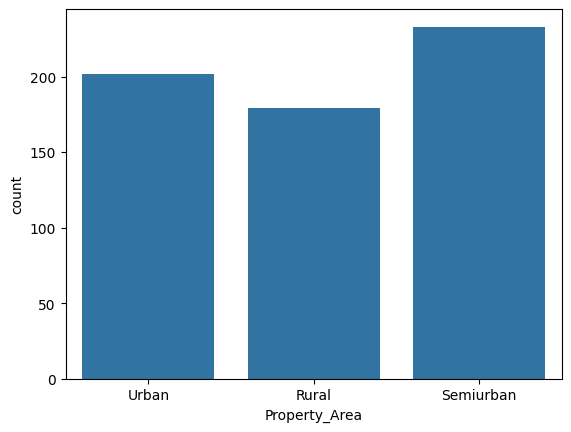

In [20]:
#Property_Area

print(df['Property_Area'].value_counts(dropna=False))

sns.countplot(data=df, x='Property_Area')

Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

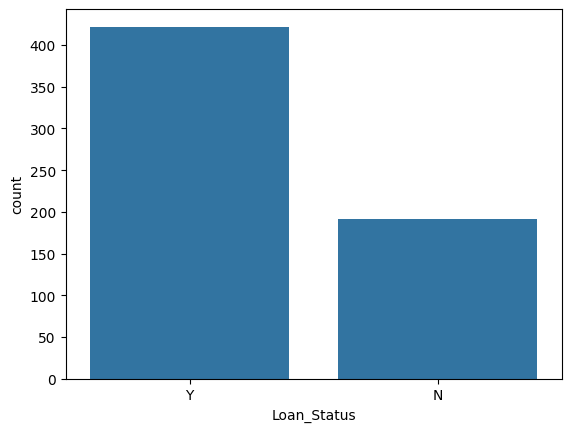

In [21]:
#Loan_Status


print(df['Loan_Status'].value_counts(dropna=False))

sns.countplot(data=df, x='Loan_Status')

#### Applicant's income is relational to loan ammount

# Bivariate and Multivariate

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


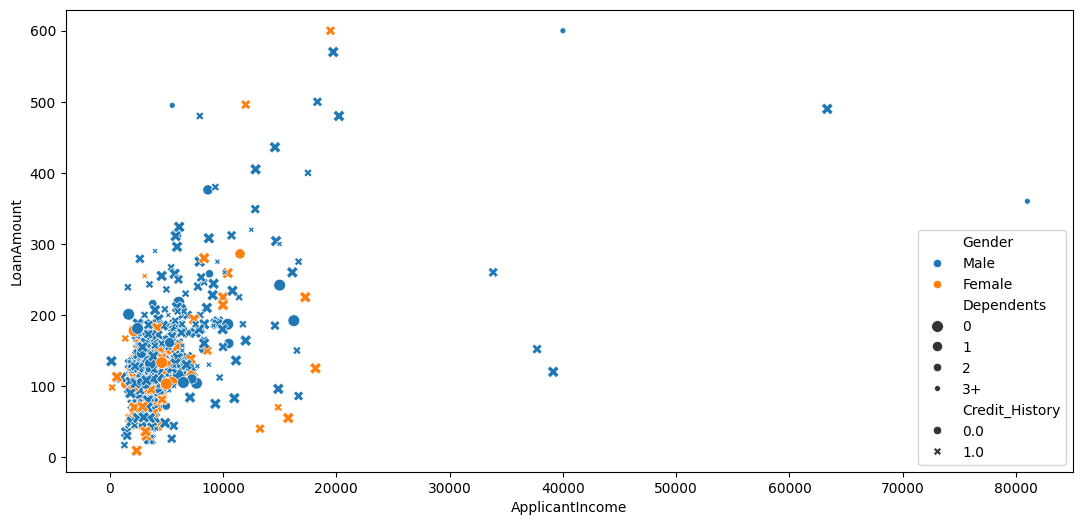

In [23]:
plt.figure(figsize=(13,6))
sns.scatterplot(y='LoanAmount', x='ApplicantIncome', hue='Gender', data=df, style='Credit_History', size='Dependents')
plt.show()

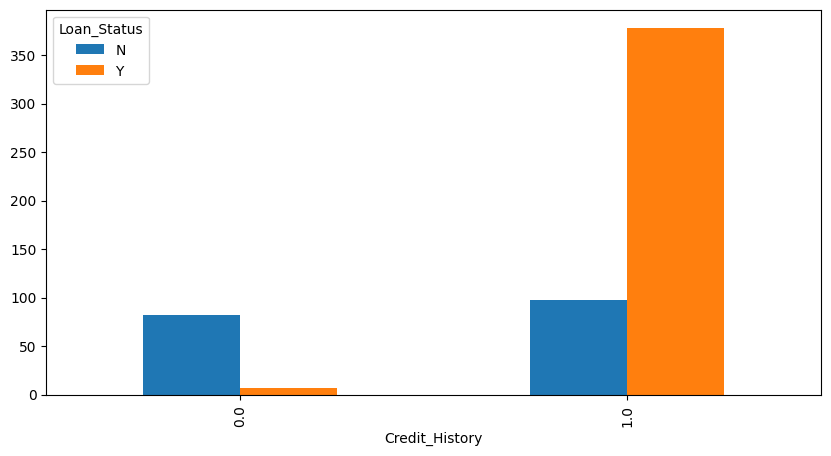

In [24]:
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar', figsize=(10,5))
plt.show()

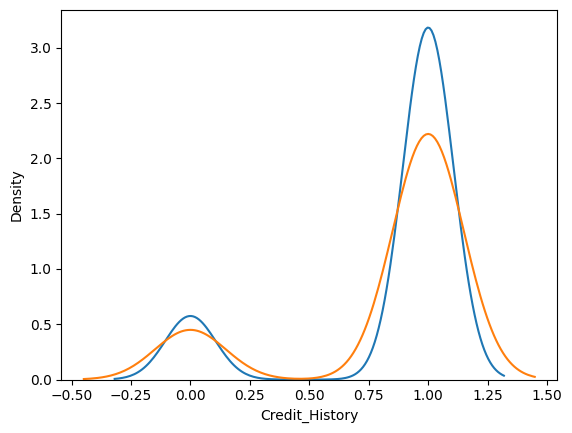

In [25]:
# plt.figure(figsize=(10,15))
sns.kdeplot(df[df['Gender']=='Male']['Credit_History'])
sns.kdeplot(df[df['Gender']=='Female']['Credit_History'])
plt.show()

<Axes: >

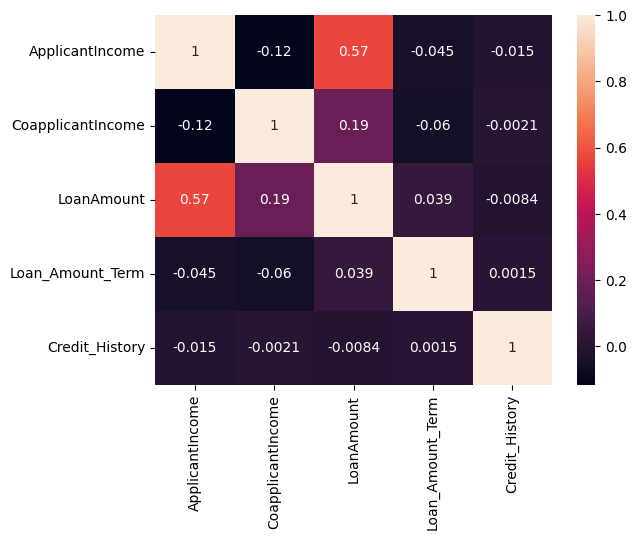

In [26]:
#HeatMap
#Categorical and Categorical Datatypes

correlation_matrix= df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

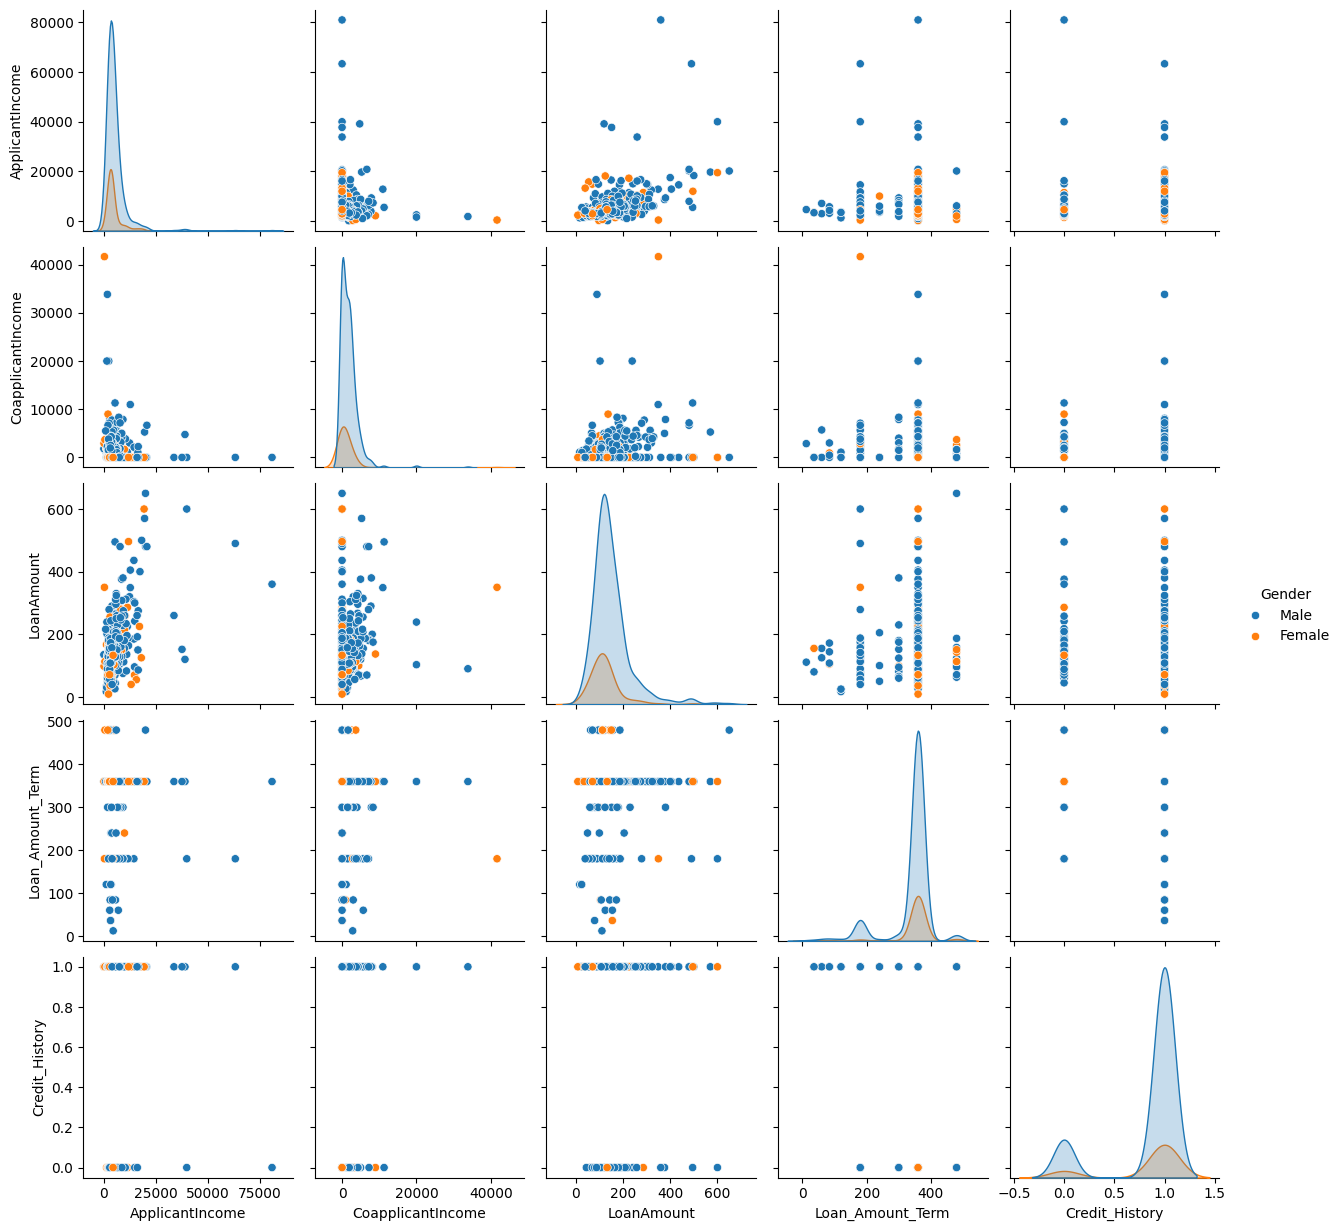

In [27]:
#makings plots for all numerical columns


sns.pairplot(df, hue= 'Gender')
plt.show()

# Cleaning Data and Missing Value Imputation

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df.drop(['Loan_ID'], axis=1, inplace=True)
df['ApplicantIncome']= df['ApplicantIncome'].astype(float)


In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
print(df.isna().sum())
print(df.info())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area

In [32]:
print(df['LoanAmount'].var())
print(df['Loan_Amount_Term'].var())
print(df['Credit_History'].var())

7325.190241002422
4240.667779632721
0.13313618784878373


In [33]:
df['Gender']= df['Gender'].fillna('Male')
df["Married"]= df["Married"].fillna('Yes')
df["Dependents"]= df["Dependents"].fillna('0')
df["Self_Employed"]= df["Self_Employed"].fillna('No')
df["Loan_Amount_Term"]= df["Loan_Amount_Term"].fillna(360.0)
df["Credit_History"]=df['Credit_History'].fillna(df['Credit_History'].mean())

In [34]:
# from sklearn.impute import KNNImputer

#knn=KNNImputer()

# df_trans= knn.fit_transform(df)
# X_test_trans= knn.fit_transform(X_test)
# pd.DataFrame(df_trans)

In [35]:
#fillinf the Loan Amount Term with random values from the column
df.loc[df['LoanAmount'].isna(), 'LoanAmount']= df['LoanAmount'].dropna().sample(df['LoanAmount'].isna().sum()).values

In [36]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
print(df['LoanAmount'].var())
print(df['Loan_Amount_Term'].var())
print(df['Credit_History'].var())

7277.461387632778
4151.048243539807
0.12227679242881771


In [38]:
df['Credit_History'].describe()

count    614.000000
mean       0.842199
std        0.349681
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [39]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [40]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

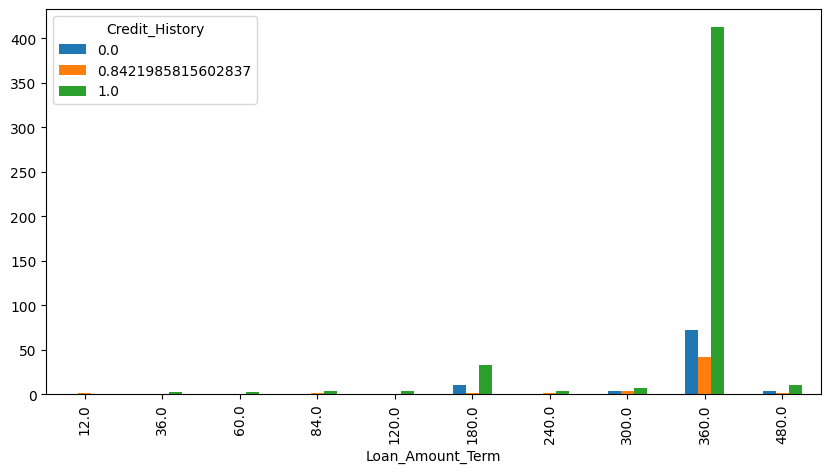

In [41]:
pd.crosstab(df['Loan_Amount_Term'], df['Credit_History']).plot(kind='bar', figsize=(10,5))
plt.show()

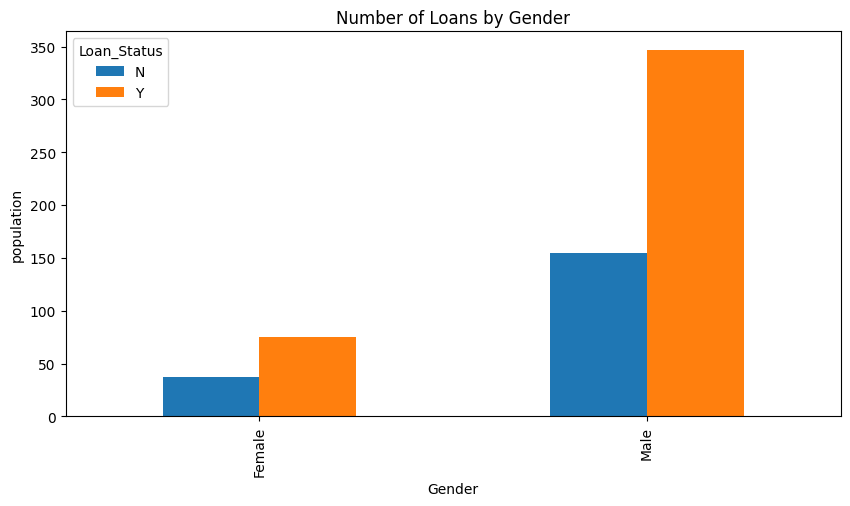

In [42]:
pd.crosstab(df['Gender'], df['Loan_Status']).plot(kind='bar', figsize=(10,5))

# Plotting

plt.title('Number of Loans by Gender')
plt.ylabel('population')
plt.xlabel('Gender')
plt.show()

In [43]:
# df.drop(['Gender'], axis=1, inplace=True)


<Axes: xlabel='Married'>

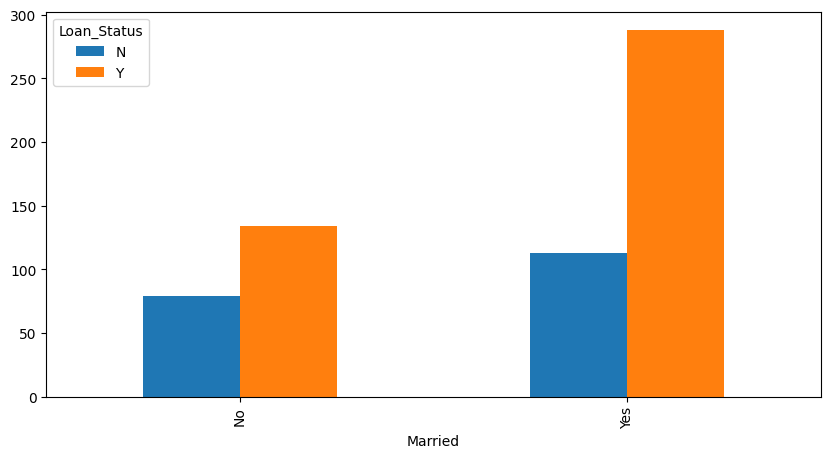

In [44]:
pd.crosstab(df['Married'], df['Loan_Status']).plot(kind='bar', figsize=(10,5))

# Outlier Handling

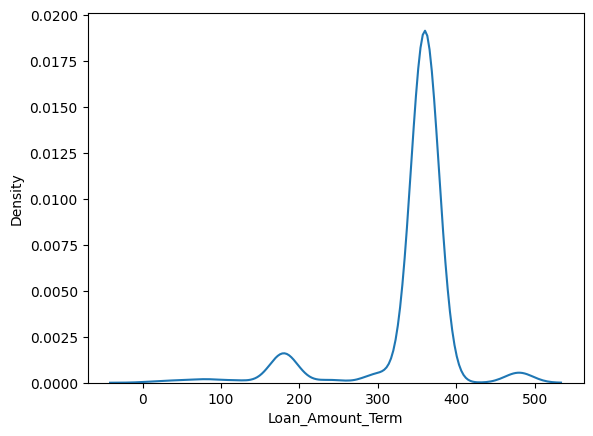

In [45]:
sns.kdeplot(df['Loan_Amount_Term'])
plt.show()

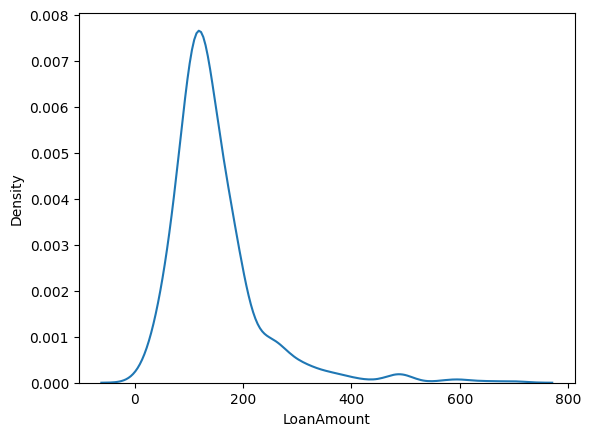

2.613502879893812

In [46]:
sns.kdeplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].skew()

will use IQR to remove outliers

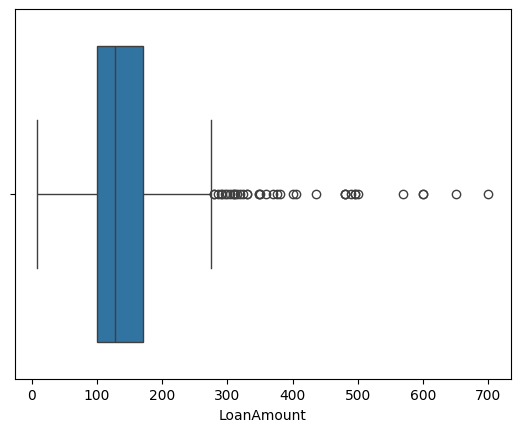

In [47]:
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [48]:
Q3= df['LoanAmount'].quantile(0.75)
Q1= df['LoanAmount'].quantile(0.25)
print('Q1 is', Q1)
print('Q3 is', Q3)

Q1 is 100.0
Q3 is 171.5


In [49]:
iqr= Q3-Q1
print('IOR is', iqr)
UpperLimit= Q3 + 1.5*iqr
LowerLimit= Q1 - 1.5*iqr
print(LowerLimit)
print(UpperLimit)

IOR is 71.5
-7.25
278.75


In [50]:
LowerLimit=0

In [51]:
#finding number of outliers
print(df[df['LoanAmount']>UpperLimit].shape)
pd.DataFrame(df[df['LoanAmount']>UpperLimit]['LoanAmount'])

(38, 12)


,LoanAmount
9,349.0
21,315.0
34,320.0
54,286.0
67,312.0
126,370.0
130,650.0
135,290.0
155,600.0
171,700.0


In [52]:
#Capping the data

df['LoanAmount']= np.where(
    df['LoanAmount'] > UpperLimit,
    UpperLimit,
    np.where(
        df['LoanAmount'] < LowerLimit,
        LowerLimit,
        df['LoanAmount']
        )
    )

In [53]:
pd.DataFrame(df[df['LoanAmount']>UpperLimit]['LoanAmount'])

,LoanAmount


0.7791195033002488


<Axes: xlabel='LoanAmount', ylabel='Density'>

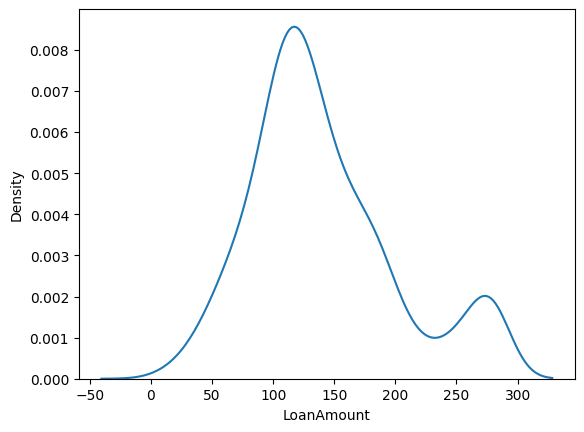

In [54]:
print(df['LoanAmount'].skew())
sns.kdeplot(df['LoanAmount'])

# Encoding Data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [56]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,80.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [57]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [59]:
oe = OrdinalEncoder(categories=[['Not Graduate', 'Graduate']])
ohe = OneHotEncoder(drop = 'first', sparse_output=False, handle_unknown= 'error')
le = LabelEncoder()

df['Gender']=ohe.fit_transform(df[['Gender']])
df['Married']=ohe.fit_transform(df[['Married']])
df['Education']=oe.fit_transform(df[['Education']])
df['Self_Employed']=ohe.fit_transform(df[['Self_Employed']])
df['Dependents']=ohe.fit_transform(df[['Dependents']])
df['Property_Area']=ohe.fit_transform(df[['Property_Area']])
df['Loan_Status']=ohe.fit_transform(df[['Loan_Status']])


In [60]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,80.0,360.0,1.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,0.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,0.0,1.0
612,1.0,1.0,0.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,0.0,1.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


# Model Selection

In [62]:
X= df.drop(columns=['Loan_Status'], axis=1)
y=df['Loan_Status']

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [64]:
print(X_train.shape)
print(y_train.shape)

(491, 11)
(491,)


In [65]:
y_train.value_counts()

Loan_Status
1.0    342
0.0    149
Name: count, dtype: int64

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 83 to 102
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    float64
 1   Married            491 non-null    float64
 2   Dependents         491 non-null    float64
 3   Education          491 non-null    float64
 4   Self_Employed      491 non-null    float64
 5   ApplicantIncome    491 non-null    float64
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         491 non-null    float64
 8   Loan_Amount_Term   491 non-null    float64
 9   Credit_History     491 non-null    float64
 10  Property_Area      491 non-null    float64
dtypes: float64(11)
memory usage: 46.0 KB


In [67]:
#importing algos

from sklearn.metrics import r2_score,accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
clfs = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [69]:
# Define the parameter grids for each classifier

param_grids = {
    'LogisticRegression': {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    },
    
    'SVC': {
        'kernel': ['rbf','sigmoid'],
        'gamma': ['scale', 'auto'],

    },
    
    'GaussianNB': {
        'var_smoothing': [1e-09, 1e-08, 1e-07]
    },
    
    'BernoulliNB': {
        'alpha': [0.1, 0.5, 1.0],
        'binarize': [0.0, 0.5, 1.0]
    },
    
    'MultinomialNB': {
        'alpha': [0.1, 0.5, 1.0]
    },
    
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    
    'RandomForestClassifier': {
        'n_estimators': [50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5],
        'bootstrap': [True, False]
    },
    
    'AdaBoostClassifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    
    'BaggingClassifier': {
        'n_estimators': [50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5],
        'bootstrap': [True, False]
    },
    
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5]
    },
    
    'XGBClassifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.3, 0.5],
        'max_depth': [3, 5],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0]
    }
}


In [70]:
accuracy_scores= []
precision_scores= []


def train_classifier(clf,param_grid,X_train,y_train,X_test,y_test):
    
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) #n+jobs =-1 uses all the CPU cores. n_jobs=2 will use 2 cores in parallel
    grid_search.fit(X_train,y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

for name,clf in clfs.items():
    
    print(f"Running GridSearchCV for {name}")
    param_grid = param_grids[name]
    current_accuracy,current_precision = train_classifier(clf,param_grid, X_train,y_train,X_test,y_test)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Running GridSearchCV for LogisticRegression


C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\Loca

Running GridSearchCV for SVC
Running GridSearchCV for GaussianNB
Running GridSearchCV for BernoulliNB
Running GridSearchCV for MultinomialNB
Running GridSearchCV for DecisionTreeClassifier
Running GridSearchCV for KNeighborsClassifier
Running GridSearchCV for RandomForestClassifier
Running GridSearchCV for AdaBoostClassifier


C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Running GridSearchCV for BaggingClassifier
Running GridSearchCV for ExtraTreesClassifier
Running GridSearchCV for GradientBoostingClassifier
Running GridSearchCV for XGBClassifier


C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [71]:
algo_df= pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending =False)
algo_df

,Algorithm,Accuracy,Precision
5,DecisionTreeClassifier,0.756098,0.765957
2,GaussianNB,0.788618,0.764706
9,BaggingClassifier,0.788618,0.764706
0,LogisticRegression,0.788618,0.759615
3,BernoulliNB,0.788618,0.759615
7,RandomForestClassifier,0.788618,0.759615
8,AdaBoostClassifier,0.788618,0.759615
10,ExtraTreesClassifier,0.788618,0.759615
12,XGBClassifier,0.788618,0.759615
11,GradientBoostingClassifier,0.756098,0.731481


In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score (GaussianNB(), X,y, cv=5, scoring='accuracy')

array([0.79674797, 0.75609756, 0.76422764, 0.82926829, 0.80327869])

In [89]:
import pickle
pickle.dump(GaussianNB(),open('model.pkl','wb'))